In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


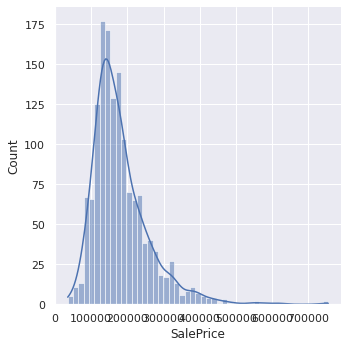

In [5]:
# Analyize target variable 'SalePrice'
sns.displot(df_train['SalePrice'], kde=True)
print('Skewness: {}'.format(df_train['SalePrice'].skew()))
print('Kurtosis: {}'.format(df_train['SalePrice'].kurt()))

In [6]:
# Find out the features which correlated parameter is greater than 0.3
corr = df_train.corr()
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [7]:
# Focus on the correlated feature
df_train = df_train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
df_test = df_test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
print(df_train.shape)
print(df_test.shape)

(1460, 19)
(1459, 18)


In [8]:
# Check null values in train dataset
train_total_null = df_train.isnull().sum().sort_values(ascending=False)
train_percent = (df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)
train_null_values = pd.concat([train_total_null, train_percent], axis=1, keys=['Total null', 'Percent'])
train_null_values.head(20)

,Total null,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


In [9]:
# Drop columns that the null values is over 15%
train_null_value_index = train_null_values[train_null_values['Percent']>0.15].index
df_train = df_train.drop(train_null_value_index, axis=1)
df_train.isnull().sum().sort_values(ascending=False)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64

In [10]:
# Since all features in training dataset is numerical, fill the missing data with mean value
print(df_train.select_dtypes(include='object').columns)
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())
df_train.isnull().sum().sort_values(ascending=False)

Index([], dtype='object')


OverallQual     0
YearBuilt       0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
SalePrice       0
dtype: int64

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')


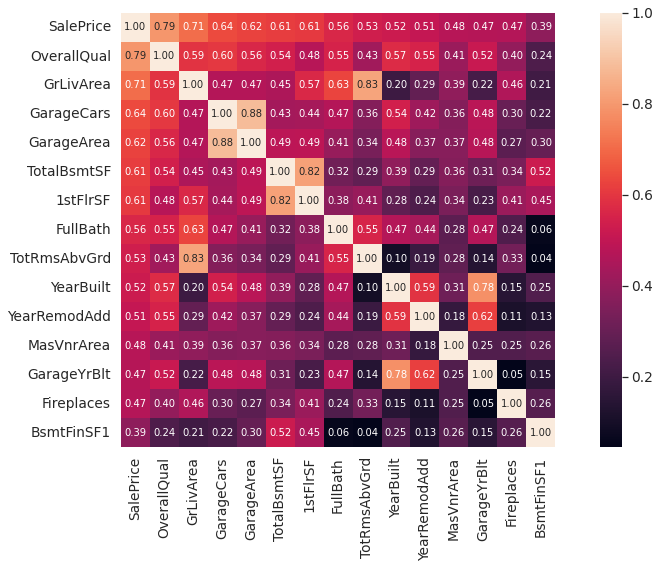

In [11]:
# Choosing features for modeling
plt.figure(figsize=(16,8))
corrmat = df_train.corr()
cols = corrmat.nlargest(15, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
df_train = df_train[cols]
df_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,2003.0,0,706
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1976.0,1,978
2,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,2001.0,1,486
3,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1998.0,1,216
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,2000.0,1,655


In [13]:
df_test = df_test[cols.drop('SalePrice')]
df_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,1961.0,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,1958.0,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1997.0,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1998.0,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,1992.0,0,263.0


In [14]:
# Check null values in test dataset
test_total_null = df_test.isnull().sum().sort_values(ascending=False)
test_percent = (df_test.isnull().sum()/len(df_train)).sort_values(ascending=False)
test_null_values = pd.concat([test_total_null, test_percent], axis=1, keys=['Total null', 'Percent'])
test_null_values.head(20)

,Total null,Percent
GarageYrBlt,78,0.053425
MasVnrArea,15,0.010274
GarageCars,1,0.000685
GarageArea,1,0.000685
TotalBsmtSF,1,0.000685
BsmtFinSF1,1,0.000685
OverallQual,0,0.000000
GrLivArea,0,0.000000
1stFlrSF,0,0.000000
FullBath,0,0.000000


In [15]:
# Since all features in training dataset is numerical, fill the missing data with mean value
print(df_test.select_dtypes(include='object').columns)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mean())
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test.isnull().sum().sort_values(ascending=False)

Index([], dtype='object')


OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
GarageYrBlt     0
Fireplaces      0
BsmtFinSF1      0
dtype: int64

In [16]:
# Split the train dataset into train and test samples
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer


X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_test

147     222500
676      87000
1304    130000
1372    274300
1427    140000
         ...  
908     131000
1096    127000
637      93000
753     275500
554     284000
Name: SalePrice, Length: 438, dtype: int64

In [17]:
# Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

lr_pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
dt_pipe = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeRegressor())])
rf_pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
gb_pipe = Pipeline([('scaler', StandardScaler()), ('rf', GradientBoostingRegressor())])

lr_pipe.fit(X_train, y_train)
dt_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)
gb_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', GradientBoostingRegressor())])

In [18]:
# Regression evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_pred = lr_pipe.predict(X_test)
dt_pred = dt_pipe.predict(X_test)
rf_pred = rf_pipe.predict(X_test)
gb_pred = gb_pipe.predict(X_test)

lr_mae = round(mean_absolute_error(y_test, dt_pred), 2)
lr_rmse = round(mean_squared_error(y_test, lr_pred, squared=False), 2)
lr_r2_score = round(r2_score(y_test, lr_pred), 2)

dt_mae = round(mean_absolute_error(y_test, dt_pred), 2)
dt_rmse = round(mean_squared_error(y_test, dt_pred, squared=False), 2)
dt_r2_score = round(r2_score(y_test, dt_pred), 2)

rf_mae = round(mean_absolute_error(y_test, rf_pred), 2)
rf_rmse = round(mean_squared_error(y_test, rf_pred, squared=False), 2)
rf_r2_score = round(r2_score(y_test, rf_pred), 2)


gb_mae = round(mean_absolute_error(y_test, gb_pred), 2)
gb_rmse = round(mean_squared_error(y_test, gb_pred, squared=False), 2)
gb_r2_score = round(r2_score(y_test, gb_pred), 2)

summary_dict = {'MAE': [lr_mae, dt_mae, rf_mae, gb_mae],
                'RMSE': [lr_rmse, dt_rmse, rf_rmse, gb_rmse],
                'R2 score': [lr_r2_score, dt_r2_score, rf_r2_score, gb_r2_score]}

summary = pd.DataFrame(data=summary_dict, index=['Linear regression', 'Decision Tree', 'Random forest', 'Gradient boosting'])
summary

,MAE,RMSE,R2 score
Linear regression,23935.10,32428.08,0.82
Decision Tree,23935.10,34836.70,0.79
Random forest,17562.03,27474.67,0.87
Gradient boosting,17552.69,27042.74,0.87


In [19]:
test_pred = gb_pipe.predict(df_test)
test_pred = pd.DataFrame(test_pred, columns=['SalePrice'])
test_pred

,SalePrice
0,123794.225549
1,149702.605878
2,174199.308749
3,182588.652437
4,200619.020799
...,...
1454,71551.237764
1455,86103.365599
1456,161717.850039
1457,115416.335266


In [20]:
# Get the 'Id' column from the original test dataset
# Combine 'Id' and the prediction into a new dataframe
test_id = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')['Id']

result = pd.concat([test_id, test_pred], axis=1)
result.head()

,Id,SalePrice
0,1461,123794.225549
1,1462,149702.605878
2,1463,174199.308749
3,1464,182588.652437
4,1465,200619.020799


In [21]:
result.to_csv('submission.csv', index=False)